<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Trabajo Clase 14: Regresión lineal multivariada}$$

Nombe alumno:ANA MUÑOZ MAQUERA



Caso de estudio: **"Base financiera"**

Haciendo uso de la base entregada desarrollar un modelo de regresión lineal multivariado / multiple usando como variable target el ingreso:


Total de puntos (20 ptos)


In [ ]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm
from statsmodels.formula.api import ols


### **Paso 1**
1. Carga y muestreo. 
  *   Cargar la base de datos para la actividad.  **(1pto)**
  *   Elegir las muestras de train y test con una proporción de 70% y 30%  **(2ptos)**

In [ ]:
df = pd.read_csv('Base_financiera_1.csv', sep=';', index_col='ID')
df.sample(2)

,Edad,Estado_civil,Genero,Zona_geografica,Ingreso,Numero_entidades_sbs,Tenencia_Saldo_rcc,Tenencia_prestamos_rcc,Tenencia_hipotecario_rcc,Saldo_tc_rcc,...,Antiguedad_pld,Antiguedad_activos,Nro_meses_rcc,Tenencia_ahorros_6m,Tenencia_depo_plazo_6m,Tenencia_cts_6m,Tenencia_FFMM_6m,Nro_meses_visitaOficina_5M,cant_vecesvisitaoficina_5m,Target_mora
ID,,,,,,,,,,,,,,,,,,,,,
10013,61,Casado,Masculino,LIMA NORTE,2500,5,1,1,0,0,...,0,0,96,1,1,0,1,5,17,SIN ATRASO
2172,38,Soltero,Masculino,LIMA MODERNA,10500,3,1,0,1,0,...,0,47,97,1,0,1,0,1,1,SIN ATRASO


In [ ]:
# Eligiendo la variable target
y = df['Ingreso']
x = df.drop(columns='Ingreso')

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2023, test_size=0.30, shuffle=True)

### **Paso 2**
2. Seleccionar un grupo de variables que sean adecuadas para el modelo. Describa los criterios o el método de selección utilizado **(3 ptos)**




#### Variables Categoricas

* Como se hara un modelo de regresion decido utilizar solo las variables numericas. En caso necesite mas informacion podria dummisar las variables categoricaa para no eliminarlas
* Dropeo las variables Estado_civil, Genero, Zona_geografica y Target_mora


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450 entries, 6983 to 4952
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Edad                          7450 non-null   int64 
 1   Estado_civil                  7450 non-null   object
 2   Genero                        7450 non-null   object
 3   Zona_geografica               7450 non-null   object
 4   Numero_entidades_sbs          7450 non-null   int64 
 5   Tenencia_Saldo_rcc            7450 non-null   int64 
 6   Tenencia_prestamos_rcc        7450 non-null   int64 
 7   Tenencia_hipotecario_rcc      7450 non-null   int64 
 8   Saldo_tc_rcc                  7450 non-null   int64 
 9   Saldo_prestamo_rcc            7450 non-null   int64 
 10  Saldo_hipotecario_rcc         7450 non-null   int64 
 11  deuda_rcc                     7450 non-null   int64 
 12  Tenencia_TC_rcc               7450 non-null   int64 
 13  Nro_bancos_tc_s

In [ ]:
# Eliminano columnas categoricas
x_train = x_train.drop(columns=['Estado_civil', 'Genero', 'Zona_geografica', 'Target_mora'], axis=1)

#### Variables altamente correlacionadas

* Analizo las correlaciones y elimino las que son mayores a 0.9

In [ ]:
# Evaluo correlaciones
corr = x_train.corr()
corr

,Edad,Numero_entidades_sbs,Tenencia_Saldo_rcc,Tenencia_prestamos_rcc,Tenencia_hipotecario_rcc,Saldo_tc_rcc,Saldo_prestamo_rcc,Saldo_hipotecario_rcc,deuda_rcc,Tenencia_TC_rcc,...,Nro_productos_pasivos,Antiguedad_pld,Antiguedad_activos,Nro_meses_rcc,Tenencia_ahorros_6m,Tenencia_depo_plazo_6m,Tenencia_cts_6m,Tenencia_FFMM_6m,Nro_meses_visitaOficina_5M,cant_vecesvisitaoficina_5m
Edad,1.000000,-0.178377,-0.218894,-0.133144,-0.265772,-0.030367,-0.028021,-0.030656,-0.025430,-0.218308,...,-0.085443,-0.071045,-0.131903,-0.024157,0.061800,0.275327,-0.148601,0.191457,-0.176381,-0.104252
Numero_entidades_sbs,-0.178377,1.000000,0.576283,0.245118,0.244414,0.067569,0.036469,0.032137,0.046428,0.549855,...,0.054960,0.067325,0.125126,0.453881,-0.166882,-0.151041,0.012892,-0.136695,0.183502,0.090188
Tenencia_Saldo_rcc,-0.218894,0.576283,1.000000,0.204230,0.226067,0.038408,0.017356,0.022327,-0.007324,0.637287,...,0.076713,0.093727,0.120924,0.357321,-0.121266,-0.135889,0.077798,-0.128834,0.137822,0.051142
Tenencia_prestamos_rcc,-0.133144,0.245118,0.204230,1.000000,0.125703,0.057172,0.058462,-0.000888,0.016861,0.152844,...,0.019011,0.402730,0.150008,0.120501,-0.070202,-0.123512,0.028515,-0.092620,0.113719,0.080781
Tenencia_hipotecario_rcc,-0.265772,0.244414,0.226067,0.125703,1.000000,0.053067,0.019070,0.078440,0.020368,0.182222,...,0.037619,0.065202,0.482605,0.123274,-0.045206,-0.160269,0.050826,-0.152474,0.094967,0.050775
Saldo_tc_rcc,-0.030367,0.067569,0.038408,0.057172,0.053067,1.000000,0.275544,0.157034,0.588583,0.046545,...,0.001995,0.039940,0.056831,0.030586,-0.023490,-0.037553,0.008423,-0.037074,0.010771,-0.004647
Saldo_prestamo_rcc,-0.028021,0.036469,0.017356,0.058462,0.019070,0.275544,1.000000,0.126371,0.294424,0.013095,...,0.003008,0.071274,0.061779,0.006862,-0.016343,-0.036519,0.004343,-0.031958,0.015459,-0.008367
Saldo_hipotecario_rcc,-0.030656,0.032137,0.022327,-0.000888,0.078440,0.157034,0.126371,1.000000,0.189184,0.016843,...,-0.002175,0.030119,0.106827,0.002029,-0.041522,-0.022016,0.005220,-0.030171,0.021911,0.007909
deuda_rcc,-0.025430,0.046428,-0.007324,0.016861,0.020368,0.588583,0.294424,0.189184,1.000000,0.003625,...,-0.011548,0.011734,0.038601,0.013517,-0.035740,-0.040699,-0.013799,-0.038603,0.009422,0.003284
Tenencia_TC_rcc,-0.218308,0.549855,0.637287,0.152844,0.182222,0.046545,0.013095,0.016843,0.003625,1.000000,...,0.190918,0.076983,0.109280,0.438313,-0.109319,-0.069025,0.074116,-0.072064,0.135090,0.060165


In [ ]:
# Obteniendo correlaciones mayores a 0.9 y -0.9
corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
corr = corr.unstack().dropna().sort_values(ascending=False)
corr = corr[corr!=1]

corre_high = corr[corr>=0.9]
corre_low = corr[corr<=-0.9]

# variables con alta correlacion
corre_high 
# Nro_productos_activo_rcc  y Cantidad_productos_rcc varibales con 1 de correlacion
#corre_low # vacio

<ipython-input-139-cff1476024df>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))


Numero_entidades_sbs  Nro_bancos_tc_saldo    0.918498
dtype: float64

In [ ]:
# Drop variables altamente correlacionadas
x_train = x_train.drop(columns=['Nro_bancos_tc_saldo','Cantidad_productos_rcc'], axis=1)

# Columnas que quedan
print('Columas que quedan :', len(x_train.columns))

Columas que quedan : 43


#### Sequential Feature Selector
* De las columnas que nos quedan elegimos solo el 50% paraprobar en el modelo y elegir las mejores

In [ ]:
# from sklearn.feature_selection import SequentialFeatureSelector

# selector = SequentialFeatureSelector(
#     estimator=LinearRegression(), n_features_to_select=20,
#     direction='forward', cv=5, scoring='r2'
# )
# selector.fit(x_train,y_train)

# selected_forward = x_train.columns[selector.get_support()]
# columnas = selected_forward.sort_values().tolist()
# columnas

In [ ]:
# Columnas elegidas para probar el modelo
x_train = x_train[columnas]
# Utilizando las columnas para el dataset de test
x_test = x_test[columnas]

### **Paso 3**
*   Entrenar el modelo en la subpoblación de train **(3ptos)**
*   Analizar la significancia de las variables en el modelo elegido **(2ptos)**
*   Elija 2 coeficientes del modelo de regresión e interpretelo **(2ptos)**
*   Calcular e interpretar la métrica de bondad de ajuste para el modelo "R2_score" en los subgrupos de train y test (comparar) **(3ptos)**:


In [ ]:
# Normalizando 
scaler = StandardScaler()
norm_x = scaler.fit(x_train)

# Dataset despues de la normalizacion
x_train_norm = norm_x.transform(x_train)
x_test_norm = norm_x.transform(x_test)

x_train = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_test = pd.DataFrame(x_test_norm, columns=x_test.columns)

# # normalizando Ingresos
norm_y = scaler.fit(y_train.values.reshape(-1, 1))
y_train_norm = norm_y.transform(y_train.values.reshape(-1, 1))
y_test_norm = norm_y.transform(y_test.values.reshape(-1, 1))

y_train = pd.DataFrame(y_train_norm)#, columns=y_train.index)
y_test = pd.DataFrame(y_test_norm)#, #columns=y_test.index)

In [ ]:
# entrenando el modelo en train
lr = LinearRegression()
lr_model = lr.fit(x_train, y_train)

In [ ]:
# intercepto y coeficiente de variables

print('Intercepto: ', lr_model.intercept_)
print('Coeficiente: ' , list(zip(x_train.columns, lr_model.coef_.flatten())))

Intercepto:  [-9.98609623e-18]
Coeficiente:  [('Antiguedad_activos', -0.006460743285714706), ('Antiguedad_depo_plazo', -0.018015138880811465), ('Antiguedad_pasivos', 0.019482906279878098), ('Antiguedad_ph', 0.0036883545687720534), ('Antiguedad_pld', -0.0017792012112640553), ('Nro_meses_rcc', 0.0023987068428283735), ('Nro_productos_activo_E3', -0.003809336160868708), ('Nro_productos_activo_E4', 0.04210298773709623), ('Numero_entidades_sbs', -0.005031063582008384), ('Saldo_hipotecario_rcc', -0.005656277944033607), ('Saldo_prestamo_rcc', 0.0006169790406974723), ('Saldo_tc_rcc', -0.014312023191529655), ('Tenencia_Saldo_rcc', 0.04631449791315687), ('Tenencia_TC_rcc', 0.018949593592884364), ('Tenencia_ahorros', 0.015571363033151254), ('Tenencia_ahorros_6m', -0.009073737186560024), ('Tenencia_cts_6m', 0.026836795632906578), ('Tenencia_hipotecario_rcc', 0.014542761160500243), ('cant_vecesvisitaoficina_5m', -0.01520871061697657), ('deuda_rcc', 0.0044939901403624055)]


In [ ]:
# Lista de coeficientes del modelo entrenado
coef = list(zip(x_train.columns, lr_model.coef_.flatten()))

(pd.DataFrame(coef, columns = ['Variable', 'Coeficientes'])
.sort_values(by='Coeficientes', ascending=False)
)

,Variable,Coeficientes
12,Tenencia_Saldo_rcc,0.046314
7,Nro_productos_activo_E4,0.042103
16,Tenencia_cts_6m,0.026837
2,Antiguedad_pasivos,0.019483
13,Tenencia_TC_rcc,0.018950
14,Tenencia_ahorros,0.015571
17,Tenencia_hipotecario_rcc,0.014543
19,deuda_rcc,0.004494
3,Antiguedad_ph,0.003688
5,Nro_meses_rcc,0.002399


* Cada ingreso adicional se relaciona con **Tenencia_Saldo_rcc** en 0.04 en resumen la variable tiene un coeficiente de impacta de manera positiva a la regresion lineal
* Por el lado de la **Tenencia_ahorros_6m** impacta de manera negativa al ingreso en -0.009

In [ ]:
# Evaluando prediccion de test y train
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)

r2_test = r2_score(y_test, y_pred_test)

print('R2 score train', r2_train)
print('R2 score test', r2_test)

R2 score train 0.010732744233844627
R2 score test 0.020287672675749935


* Los resultados de R2 nos indicarian que el modelo de regresion lineal multiple no esta prediciendo bien la data train ni la data de test

### **Paso 4**

Desarrollar e interpretar cada uno de los siguientes análisis:

*   Calcular el gráfico de residuales (Residual plot)  **(1pto)**
*   Hacer la prueba de hipotesis para verificar la normalidad de los residuales **(1pto)**
*   Hacer el análisis de homocedasticidad con el gráfico 'Fitted vs Residual' **(1pto)**
*   Analizar la linealidad con el gráfico 'Fitted vs Observed' **(1pto)**





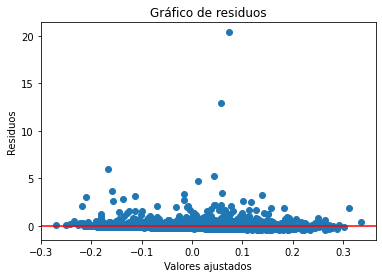

In [ ]:
# Residuales
residual = (y_test - y_pred_test)

import matplotlib.pyplot as plt

plt.scatter(y_pred_test, residual)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.show()

* Nos permite visualizar si el modelo es adecuado para los datos, pero al parecer, los valores residuales no se estan distribuyendo aleatoreamente

In [ ]:
# Normalidad de residuales

from scipy.stats import shapiro

# Realizar prueba de normalidad de Shapiro-Wilk
p_value = shapiro(residual)[1]

# Imprimir el valor p
print("Valor p: ", p_value)

# Verificar si los residuos son normales (nivel de significancia 0.05)
if p_value > 0.05:
    print("Los residuos son normales.")
else:
    print("Los residuos no son normales.")

Valor p:  0.0
Los residuos no son normales.


* Como muestra el test de shapiro los datos residuales no son normales

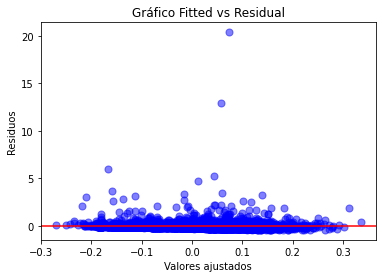

In [ ]:
# Graficar los valores ajustados vs los residuos
plt.scatter(y_pred_test, residual, c='b', s=50, alpha=0.5)

# Graficar una línea horizontal en cero
plt.axhline(y=0, color='r', linestyle='-')

# Etiquetar los ejes y agregar un título
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico Fitted vs Residual')

# Mostrar la gráfica
plt.show()

* Para el test de Homocedasticidad graficamente verificamos que los datos no se distribuyen aleatoreamente al rededor de cero. Lo que nos indicaria que la regresion lineal no es una buena tecnica

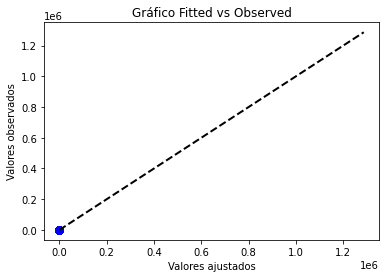

In [ ]:
# Graficar los valores ajustados vs los valores observados
plt.scatter(y_pred_test, y_test, c='b', s=50, alpha=0.5)

# Graficar una línea diagonal desde el punto mínimo al punto máximo
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

# Etiquetar los ejes y agregar un título
plt.xlabel('Valores ajustados')
plt.ylabel('Valores observados')
plt.title('Gráfico Fitted vs Observed')

# Mostrar la gráfica
plt.show()

* se Observa que los datos no se distribuyen al rededor de la linea, esto nos indica que la regresion lineal multiple no es optima para modelar este dataset